In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
fifa=pd.read_csv('/content/drive/My Drive/DSE/EDA/fifa.csv')

In [5]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [6]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


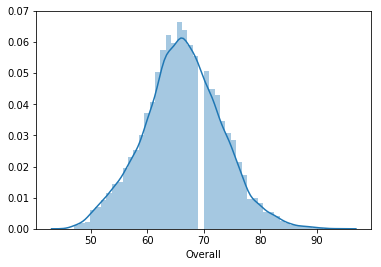

In [51]:
sns.distplot(fifa['Overall'])

In [0]:
cols=['Overall','Value', 'Wage','International Reputation','Height', 'Weight','Release Clause']

In [0]:
fifa_sub=fifa[cols]

In [12]:
fifa_sub.head()

,Overall,Value,Wage,International Reputation,Height,Weight,Release Clause
0,94,€110.5M,€565K,5.0,5'7,159lbs,€226.5M
1,94,€77M,€405K,5.0,6'2,183lbs,€127.1M
2,92,€118.5M,€290K,5.0,5'9,150lbs,€228.1M
3,91,€72M,€260K,4.0,6'4,168lbs,€138.6M
4,91,€102M,€355K,4.0,5'11,154lbs,€196.4M


In [0]:
def curr_conv(Value):
  Value=Value[1:]
  amt=Value[-1]
  if amt.lower()=='m':
    return float(Value[:-1])*1000000
  elif amt.lower()=='k':
    return float(Value[:-1])*1000

In [0]:
def ret(Value):
  try:
    return (curr_conv(Value))
  except TypeError:
    return Value

In [57]:
fifa_sub['Value']=fifa_sub['Value'].apply(curr_conv)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
fifa['Value']=fifa['Value'].apply(curr_conv)

In [58]:
fifa_sub['Wage']=fifa_sub['Wage'].apply(curr_conv)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
fifa['Wage']=fifa['Wage'].apply(ret)

In [59]:
fifa_sub['Release Clause']=fifa_sub['Release Clause'].apply(ret)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
fifa['Release Clause']=fifa['Release Clause'].apply(ret)

In [37]:
fifa_sub.head()

,Overall,Value,Wage,International Reputation,Height,Weight,Release Clause
0,94,110500000.0,565000.0,5.0,5'7,159lbs,226500000.0
1,94,77000000.0,405000.0,5.0,6'2,183lbs,127100000.0
2,92,118500000.0,290000.0,5.0,5'9,150lbs,228100000.0
3,91,72000000.0,260000.0,4.0,6'4,168lbs,138600000.0
4,91,102000000.0,355000.0,4.0,5'11,154lbs,196400000.0


In [0]:
import datetime as dt

In [40]:
fifa['Joined'].unique()

array(['Jul 1, 2004', 'Jul 10, 2018', 'Aug 3, 2017', ..., 'May 22, 2017',
       'Nov 6, 2016', 'Nov 27, 2018'], dtype=object)

In [0]:
def date(dat):
  try:
    return dt.datetime.strptime(dat,'%b %d, %Y')
  except TypeError:
    return dat

In [0]:
def date_cov(dat):
  try:
    return date(dat)
  except ValueError:
    return dt.datetime.strptime(dat,'%Y')

In [0]:
fifa['Joined']=fifa['Joined'].apply(date)

In [47]:
fifa['Joined'].head()

0   2004-07-01
1   2018-07-10
2   2017-08-03
3   2011-07-01
4   2015-08-30
Name: Joined, dtype: datetime64[ns]

In [0]:
fifa['Contract Valid Until']=fifa['Contract Valid Until'].apply(date_cov)

In [0]:
def weight_cov(x):
  try:
    return x[:-3]
  except TypeError:
    return x

In [75]:
fifa_sub['Weight']=fifa_sub['Weight'].apply(weight_cov)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
fifa['Weight']=fifa['Weight'].apply(weight_cov)

In [76]:
fifa_sub['Weight'].unique()

array(['159', '183', '150', '168', '154', '163', '146', '190', '181',
       '192', '176', '172', '148', '165', '196', '161', '187', '212',
       '170', '203', '157', '185', '130', '174', '207', '134', '141',
       '152', '179', '132', '201', '198', '209', '214', '143', '205',
       '137', '194', '216', '139', '220', '126', '218', '123', '227',
       '128', '223', '225', '121', '115', '117', '236', '229', '243', nan,
       '110', '119', '234'], dtype=object)

In [77]:
fifa_sub['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [0]:
def height_cov(x):
  try:
    ft,inc=x.split("'")
    ft=int(ft)
    inc=int(inc)
    return (ft*12)+inc
  except AttributeError:
    return x
  

In [87]:
fifa_sub['Height']=fifa_sub['Height'].apply(height_cov)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
fifa_sub['Height'].unique()

array([67., 74., 69., 76., 71., 68., 72., 66., 70., 78., 73., 64., 75.,
       65., 77., 79., 63., 62., 80., 61., 81., nan])

In [0]:
fifa['Height']=fifa['Height'].apply(height_cov)

In [92]:
sns.pairplot(fifa,diag_kind='kde')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Error in callback <function flush_figures at 0x7fd79f60a268> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
fifa_sorted=fifa.sort_values('Overall',ascending=False)

In [128]:
top_20=fifa_sorted.loc[fifa['Contract Valid Until']<dt.date(2020,1,1)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [129]:
top_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6952 entries, 12 to 18206
Data columns (total 60 columns):
ID                          6952 non-null int64
Name                        6952 non-null object
Age                         6952 non-null int64
Photo                       6952 non-null object
Nationality                 6952 non-null object
Flag                        6952 non-null object
Overall                     6952 non-null int64
Potential                   6952 non-null int64
Club                        6952 non-null object
Club Logo                   6952 non-null object
Value                       6947 non-null float64
Wage                        6952 non-null float64
Preferred Foot              6952 non-null object
International Reputation    6952 non-null float64
Weak Foot                   6952 non-null float64
Skill Moves                 6952 non-null float64
Work Rate                   6952 non-null object
Body Type                   6952 non-null object
Position

In [130]:
top_20.corr().loc['Overall','Value']

0.6080108448343073

In [0]:
position_df={}

for i in fifa['Position'].unique():
    position_df[i]=fifa.loc[fifa['Position']== i]
    position_df[i]=position_df[i].sort_values('Overall',ascending=False)
    position_df[i]=position_df[i].head()

In [108]:
position_df.keys()

dict_keys(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan])

In [0]:
from functools import reduce

In [0]:
final_df=reduce(lambda x,y:pd.merge(x,y, on='Name',how='inner'),position_df.values())

In [0]:
pos_avg_wg={}
pos_avg_age={}

for pos,data in position_df.items():
  pos_avg_wg[pos]=data.mean()['Wage']
  pos_avg_age[pos]=data.mean()['Age']
  
  